Bacha: pohlídat audioknihy.
Bacha 2: filtrovat posmrtně vydané knihy.

In [2]:
import os
import re
import statistics
import pandas as pd

In [3]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [4]:
df = pd.read_parquet(os.path.join('data/cnb_sloupce','008.parquet'))

In [5]:
sloupce = ['leader','245','080','655','072','100','041','964']

In [6]:
for s in sloupce:
    pripojit = pd.read_parquet(os.path.join("data/cnb_sloupce",f"{s}.parquet"))
    df = df.merge(pripojit, left_index=True, right_index=True, how="left")

In [7]:
df.sample(30)

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,080_a,080_2,080_x,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_m,964_a
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20091967082,090710s1874 xr a e f 000 0 cze,nam a22 a 4500,1,0,Řepařství :,"čeho třeba šetřiti, bychom z půd co možná nejl...",napsal Josef Dumek,None,None,None,None,None,"[633.63, 633, (035)]","[MRF, MRF, MRF]",None,None,[7],[příručky],[fd133209],[czenas],None,None,None,None,[7],[633],[Rostlinná výroba],[Konspekt],[24],1,"Dumek, Josef,",jk01023310,[aut],1844-1903,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nkc20142603856,140610s2014 xr a b 000 0 cze d,cam a22 a 4500,1,0,Matematika a její aplikace :,procvičování učiva matematiky pro 2. až 3. roč...,"Petra Cemerková Golová, Naděžda Kalábová, Svat...","[Pracovní sešit 1,]",[Sčítání a odčítání do 20 /],None,None,None,"[51, 373.3.016, (076.1), (0.053.2)]","[MRF, MRF, MRF, MRF]",None,None,"[7, 7, 9, 9]","[pracovní sešity, publikace pro děti, activity...","[fd133116, fd133156, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,"[7, 7]","[51, 0/9-053.2]","[Matematika, Literatura pro děti a mládež (nau...","[Konspekt, Konspekt]","[13, 26]",1,"Cemerková Golová, Petra",hka2014817725,[aut],None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nkc20112196374,110726s2010 xr a c f 000 0 cze,nam a22 a 4500,1,0,Chemie pod lavicí :,pro základní školy /,"[Filip Pýcha, Andrej Smrdu]",None,None,None,None,None,"[54, 54.021/.022, 544.4.021:003.292, 54:51-3, ...","[MRF, MRF, MRF, MRF, MRF, MRF]",None,None,"[7, 9]","[učební pomůcky, teaching aids]","[fd133775, None]","[czenas, eczenas]",None,None,None,None,[7],[54],[Chemie. Mineralogické vědy],[Konspekt],[10],1,"Pýcha, Filip,",jx20110725020,[aut],1975-,None,None,None,None,1,[cze],[slv],None,None,None,None,None,None,None,None,None,NaN
bk193800448,990129s1938 xr cze,nam a22 1 4500,1,0,O povaze svátostných charakterů /,None,Antonín Čala,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Čala, Antonín,",jk01020960,[aut],1907-1984,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cpk19980528548,981104s1995 xr a j 000 0 cze,nam a22 a 4500,1,0,Vystřihované obrázky /,None,[Marie Brahová],None,None,None,None,None,[745],[undef],None,None,[7],[příručky],[fd133209],[czenas],None,None,None,None,[7],[74],[Kresba. Umělecká řemesla],[Konspekt],[21],1,"Brahová, Marie",jn20010310261,[aut],None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nkc20071727016,080702s2007 xr a e f 000 0 eng,nam a22 a 4500,1,0,Telč :,[historical monuments in the town and environs /,"text] Josef Hrdlička, Markéta Hrdličková, [pho...",None,None,None,None,None,"[72:904, (437.324), (036), (084.12)]","[MRF, MRF, MRF, MRF]",None,None,"[7, 7, 9, 9]","[informační publikace, fotografické publikace,...","[fd132454, fd132276, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[72],[Architektura],[Konspekt],[21],1,"Hrdlička, Josef,",jn20000401078,[aut],1972-,None,None,None,None,1,[eng],[cze],None,None,None,None,None,None,None,None,None,NaN
bknvla04491,041019s1979 xr e b 000 0 cze,nam a22 1a 4500,0,0,Přehled nejdůležitějších katalogů a kartoték s...,sektor knihovních fondů : sektor služeb a spec...,[zpracoval kolektiv ; red. Eugenie Richterová ...,None,None,None,None,None,"[017/019, 025.354:025.34, (437.3), (048.8)]","[MRF, MRF, MRF, MRF]",None,None,[7],[přehledy],[fd133202],[czenas],None,None,None,None,[7],[01],[Bibliografie. Katalogy],[Konspekt],[12],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bk194405354,990719s1944 xr e fl ||| | ger,nam a22 1 4500,0,0,Verordnung über die Einkommensteuer mit übers

In [8]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 1249346 entries, ck8300078 to cpk20253671290
Data columns (total 51 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   008       1249346 non-null  object
 1   leader    1249346 non-null  object
 2   245_ind1  1249345 non-null  object
 3   245_ind2  1249345 non-null  object
 4   245_a     1249346 non-null  object
 5   245_b     605002 non-null   object
 6   245_c     1028723 non-null  object
 7   245_n     76461 non-null    object
 8   245_p     58771 non-null    object
 9   245_h     150810 non-null   object
 10  245_f     18 non-null       object
 11  245_s     4 non-null        object
 12  080_a     1031195 non-null  object
 13  080_2     1031195 non-null  object
 14  080_x     5 non-null        object
 15  080_ind1  1 non-null        object
 16  655_ind2  898399 non-null   object
 17  655_a     898399 non-null   object
 18  655_7     897807 non-null   object
 19  655_2     897909 non-null   obje

In [9]:
df = df.explode('008')

In [10]:
def najdi_rok(nn8):
    if nn8[6] in ['s', 't', 'd', 'm', 'e', 'c','u', 'r']:
        try:
            return int(nn8[7:11])
        except Exception as e:
            return None
        else:
            return None
    elif nn8[6] == 'q':
        try:
            rok1 = int(nn8[7:11])
            rok2 = int(nn8[11:15])
            if rok2 - rok1 <= 5:
                return int(statistics.median([rok1, rok2]))
            else:
                return None
        except:
            return None
    else:
        return None

In [11]:
def najdi_zub(frame):
    try:
        print("Hledám zub mezi lety 1900 a 1901.")
        nula = len(frame[frame['rok'] == 1900])
        jedna = len(frame[frame['rok'] == 1901])
        print(f"1900: {nula}, 1901: {jedna}, poměr: {nula / jedna}")
    except Exception as E:
        print(E)

In [12]:
def r(x):
    return x.groupby('rok').size().plot.bar(figsize=(25,5))

In [13]:
df['rok'] = df['008'].apply(lambda x: najdi_rok(x))

In [14]:
najdi_zub(df)

Hledám zub mezi lety 1900 a 1901.
1900: 1989, 1901: 2265, poměr: 0.8781456953642384


<Axes: xlabel='rok'>

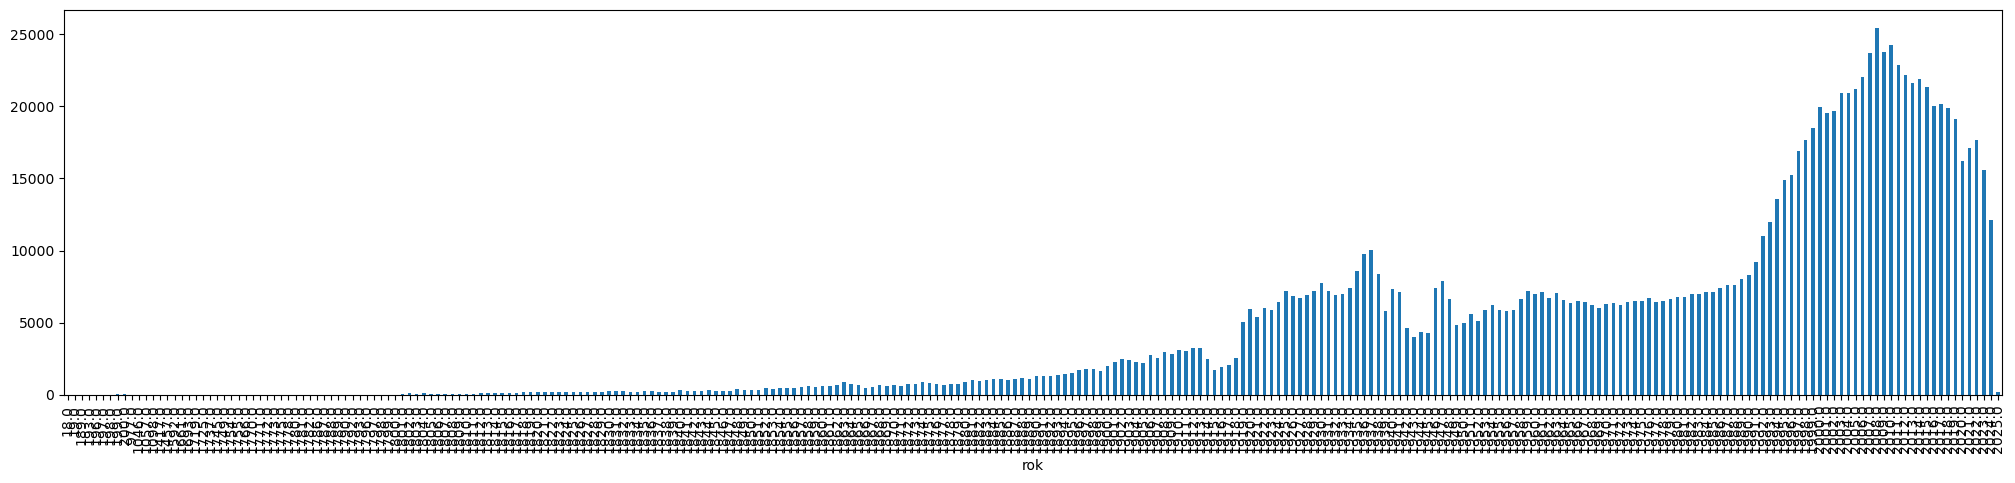

In [15]:
r(df)

In [16]:
df[df['100_a'].astype(str).str.contains('Lednická, Karin',na=False)]

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,080_a,080_2,080_x,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_m,964_a,rok
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpz20203232647,200625t20202020xr nnnng f n cze,nim a22 i 4500,1,0,Šikmý kostel /,None,Karin Lednická,None,None,None,None,None,"[821.162.3-31, 94(437.326), (0:82-311.6), (086...","[MRF, MRF, MRF, MRF, MRF]",None,None,"[7, 7, 7, 7]","[české romány, historické romány, audioknihy, ...","[fd133974, fd132414, fd119452, fd201991]","[czenas, czenas, czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,[aut],1969-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
nkc20213304795,210129m20202024xr ahf g 000 f cze,nam a22 ia4500,1,0,Šikmý kostel :,románová kronika ztraceného města /,Karin Lednická,None,None,None,None,None,"[821.162.3-31, 94(437.326), (437.326), (0:82-3...","[MRF, MRF, MRF, MRF]",None,None,"[7, 7, 9, 9]","[české romány, historické romány, Czech fictio...","[fd133974, fd132414, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,[aut],1969-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
cpz20213379057,211213t20212021xr nnnng f n cze,nim a22 i 4500,1,0,Šikmý kostel.,None,Karin Lednická,"[Druhý díl,]",[Léta 1921-1945 /],None,None,None,"[821.162.3-31, 94(437.326), (0:82-311.6), (086...","[MRF, MRF, MRF, MRF, MRF]",None,None,"[7, 7, 7, 7]","[české romány, historické romány, audioknihy, ...","[fd133974, fd132414, fd119452, fd201991]","[czenas, czenas, czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,"[aut, nrt]",1969-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
nkc20223403237,220322s2022 xr ach g 000 f cze,nam a22 i 4500,1,0,Životice :,obraz (po)zapomenuté tragédie /,Karin Lednická,None,None,None,None,None,"[821.162.3-31, 94(437.326)""1944"", (0:82-96), (...","[MRF, MRF, MRF, MRF]",None,None,"[7, 7, 7, 9, 9, 9]","[literatura faktu, české romány, dokumentární ...","[fd132773, fd133974, fd1044289, None, None, None]","[czenas, czenas, czenas, eczenas, eczenas, ecz...",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,[aut],1969-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0
nkc20223472496,221116s2022 xr g 000 f eng,nam a22 i 4500,1,4,The leaning church :,chronicle of a town that vanished: 1894-1921 /,Karin Lednická ; English translation: Pavlína ...,None,None,None,None,None,"[821.162.3-31, 94(437.326), (0:82-311.6)]","[MRF, MRF, MRF]",None,None,"[7, 7, 9, 9]","[české romány, historické romány, Czech fictio...","[fd133974, fd132414, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,[aut],1969-,None,None,None,None,1,[eng],[cze],None,None,None,None,None,None,None,None,None,NaN,2022.0
cpz20233520279,230512t20232022xr nnnng fz n cze,nim a22 i 4500,1,0,Životice :,obraz (po)zapomenuté tragédie /,Karin Lednická,None,None,None,None,None,"[821.162.3-31, 94(437.326)""1944"", (0:82-96), (...","[MRF, MRF, MRF, MRF, MRF, MRF]",None,None,"[7, 7, 7, 7, 7]","[literatura faktu, české romány, dokumentární ...","[fd132773, fd133974, fd1044289, fd119452, fd20...","[czenas, czenas, czenas, czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,"[aut, nrt]",1969-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023.0


In [17]:
df = df[(df["008"].str[15:17] == "xr") & (df["008"].str[35:38] == "cze")]

In [18]:
najdi_zub(df)

Hledám zub mezi lety 1900 a 1901.
1900: 1527, 1901: 1984, poměr: 0.7696572580645161


<Axes: xlabel='rok'>

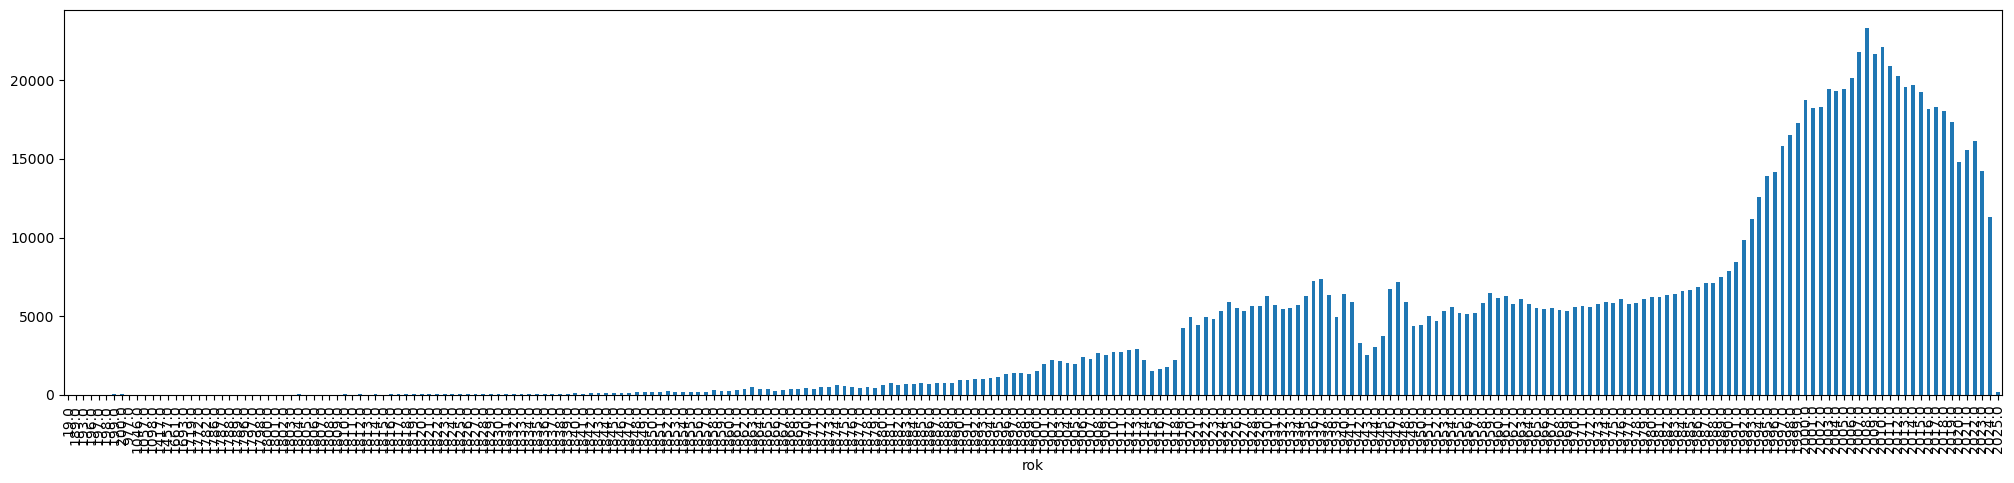

In [19]:
r(df)

In [20]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 1091049 entries, ck8300078 to cpk20253671290
Data columns (total 52 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   008       1091049 non-null  object 
 1   leader    1091049 non-null  object 
 2   245_ind1  1091048 non-null  object 
 3   245_ind2  1091049 non-null  object 
 4   245_a     1091049 non-null  object 
 5   245_b     520868 non-null   object 
 6   245_c     902243 non-null   object 
 7   245_n     65460 non-null    object 
 8   245_p     53113 non-null    object 
 9   245_h     116622 non-null   object 
 10  245_f     16 non-null       object 
 11  245_s     3 non-null        object 
 12  080_a     909923 non-null   object 
 13  080_2     909923 non-null   object 
 14  080_x     5 non-null        object 
 15  080_ind1  1 non-null        object 
 16  655_ind2  789720 non-null   object 
 17  655_a     789720 non-null   object 
 18  655_7     789227 non-null   object 
 19  655_2     7

In [21]:
df.sample(30)

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,080_a,080_2,080_x,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_m,964_a,rok
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20152734943,160219s1907 xr g 000 j cze,nam a22 i 4500,1,0,Lu /,None,napsal L. Becke,None,None,None,None,None,"[821.162.3-32, (0:82-32)]","[MRF, MRF]",None,None,"[7, 9]","[česky psané povídky, short stories in Czech]","[fd118722, None]","[czenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Becke, L.",None,[aut],None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1907.0
cpk20000925790,000302s1987 xr e r 000 0dcze,nam a22 a 4500,1,0,Ondřej Horník (1864-1917) :,písemná pozůstalost /,zpracovali Karol Bílek a Ivana Tomková,None,None,None,None,None,"[930.253:82, 78.071.1/.2, 801.82:930.253, (083...","[MRF, MRF, MRF, MRF]",None,None,[7],[soupisy],[fd133560],[czenas],None,None,None,None,[7],[78.07],"[Hudebníci, skladatelé a jiná hudební povolání]",[Konspekt],[9],1,"Bílek, Karol,",jk01012063,[aut],1939-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1987.0
nkc20233567329,231114s2023 xr a c 000 f cze,nam a22 i 4500,1,0,První kniha vikinga Vika /,None,Runer Jonsson ; ilustroval Ewert Karlsson ; ze...,None,None,None,None,None,"[821.113.6-31, 821-93, (0:82-311.5)]","[MRF, MRF, MRF]",None,None,"[7, 7, 7, 9, 9, 9]","[švédské romány, humoristické romány, publikac...","[fd133923, fd132431, fd133156, None, None, None]","[czenas, czenas, czenas, eczenas, eczenas, ecz...",None,None,None,None,"[7, 7]","[821.11, 821-93]","[Germánské literatury, Literatura pro děti a m...","[Konspekt, Konspekt]","[25, 26]",1,"Jonsson, Runer,",ola2003191706,[aut],1916-2006,None,None,None,None,1,[cze],[swe],None,None,None,None,None,None,None,None,None,NaN,2023.0
np9424696,940824s1994 xr a f 001 0 cze,nam a22 4500,1,0,Gerontopsychiatrie /,None,"J. Baštecký, Q. Kümpel, M. Vojtěchovský a kole...",None,None,None,None,None,[616.89],[undef],None,None,[7],[monografie],[fd132842],[czenas],None,None,None,None,NaN,NaN,NaN,NaN,NaN,1,"Baštecký, Jaroslav,",jn20000400107,[aut],1936-2007,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[stáří - poruchy duševní - monografie, geronto...",1994.0
bk193903088,990501s1939 xr cze,nam a22 1 4500,1,0,Výsledky pokusů s rozličnými způsoby sušení vo...,Versuchsergebnisse mit verschiedenen Trocknung...,František Svoboda,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Svoboda, František,",jk01121953,[aut],1900-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1939.0
cpc20223467210,221031s1947 xr z a 0 cze,nem a22 i 4500,0,0,Ovzdušné srážky na území ČSR v červnu 1947 =,Précipitations atmosphériques sur le territoir...,None,None,None,None,None,None,"[551.577/.578, 913(437), (084.3)551.5]","[MRF, MRF, MRF]",None,None,[7],[meteorologické mapy],[fd186759],[czenas],None,None,None,None,"[7, 7]","[551, 912]","[Geologie. Meteorologie. Klimatologie, Mapy. A...","[Konspekt, Konspekt]","[7, 7]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"[cze, fre]",None,None,None,None,None,None,None,None,None,None,NaN,1947.0
cpk20000887257,001006s2000 xr a g 000 f cze,cam a22 a 4500,1,0,Zlato Inků :,dobrodružství Dirka Pitta /,Clive Cussler ; přeložil Radovan Šimek,None,None,None,None,None,"[821.111(73)-31, (0:82-311.3)]","[MRF, MRF]",None,None,"[7, 7, 9, 9]","[americké romány, dobrodružné romány, American...","[fd131796, fd132061, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.111(73)-3],[Americká próza],[Konspekt],[25],1,"Cussler, Clive,",jn19990001580,[aut],1931-2020,None,None,None,None,1,[cze],[eng],None,None,None,None,None,None,None,None,None,NaN,2000.0
cpg20081806456,080529s2008 xr 

In [22]:
df[df['100_a'].astype(str).str.contains('Lednická, Karin',na=False)]

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,080_a,080_2,080_x,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_m,964_a,rok
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpz20203232647,200625t20202020xr nnnng f n cze,nim a22 i 4500,1,0,Šikmý kostel /,None,Karin Lednická,None,None,None,None,None,"[821.162.3-31, 94(437.326), (0:82-311.6), (086...","[MRF, MRF, MRF, MRF, MRF]",None,None,"[7, 7, 7, 7]","[české romány, historické romány, audioknihy, ...","[fd133974, fd132414, fd119452, fd201991]","[czenas, czenas, czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,[aut],1969-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
nkc20213304795,210129m20202024xr ahf g 000 f cze,nam a22 ia4500,1,0,Šikmý kostel :,románová kronika ztraceného města /,Karin Lednická,None,None,None,None,None,"[821.162.3-31, 94(437.326), (437.326), (0:82-3...","[MRF, MRF, MRF, MRF]",None,None,"[7, 7, 9, 9]","[české romány, historické romány, Czech fictio...","[fd133974, fd132414, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,[aut],1969-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
cpz20213379057,211213t20212021xr nnnng f n cze,nim a22 i 4500,1,0,Šikmý kostel.,None,Karin Lednická,"[Druhý díl,]",[Léta 1921-1945 /],None,None,None,"[821.162.3-31, 94(437.326), (0:82-311.6), (086...","[MRF, MRF, MRF, MRF, MRF]",None,None,"[7, 7, 7, 7]","[české romány, historické romány, audioknihy, ...","[fd133974, fd132414, fd119452, fd201991]","[czenas, czenas, czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,"[aut, nrt]",1969-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
nkc20223403237,220322s2022 xr ach g 000 f cze,nam a22 i 4500,1,0,Životice :,obraz (po)zapomenuté tragédie /,Karin Lednická,None,None,None,None,None,"[821.162.3-31, 94(437.326)""1944"", (0:82-96), (...","[MRF, MRF, MRF, MRF]",None,None,"[7, 7, 7, 9, 9, 9]","[literatura faktu, české romány, dokumentární ...","[fd132773, fd133974, fd1044289, None, None, None]","[czenas, czenas, czenas, eczenas, eczenas, ecz...",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,[aut],1969-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0
cpz20233520279,230512t20232022xr nnnng fz n cze,nim a22 i 4500,1,0,Životice :,obraz (po)zapomenuté tragédie /,Karin Lednická,None,None,None,None,None,"[821.162.3-31, 94(437.326)""1944"", (0:82-96), (...","[MRF, MRF, MRF, MRF, MRF, MRF]",None,None,"[7, 7, 7, 7, 7]","[literatura faktu, české romány, dokumentární ...","[fd132773, fd133974, fd1044289, fd119452, fd20...","[czenas, czenas, czenas, czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,"[aut, nrt]",1969-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023.0


In [23]:
df = df.explode("leader")

In [24]:
najdi_zub(df)

Hledám zub mezi lety 1900 a 1901.
1900: 1527, 1901: 1984, poměr: 0.7696572580645161


<Axes: xlabel='rok'>

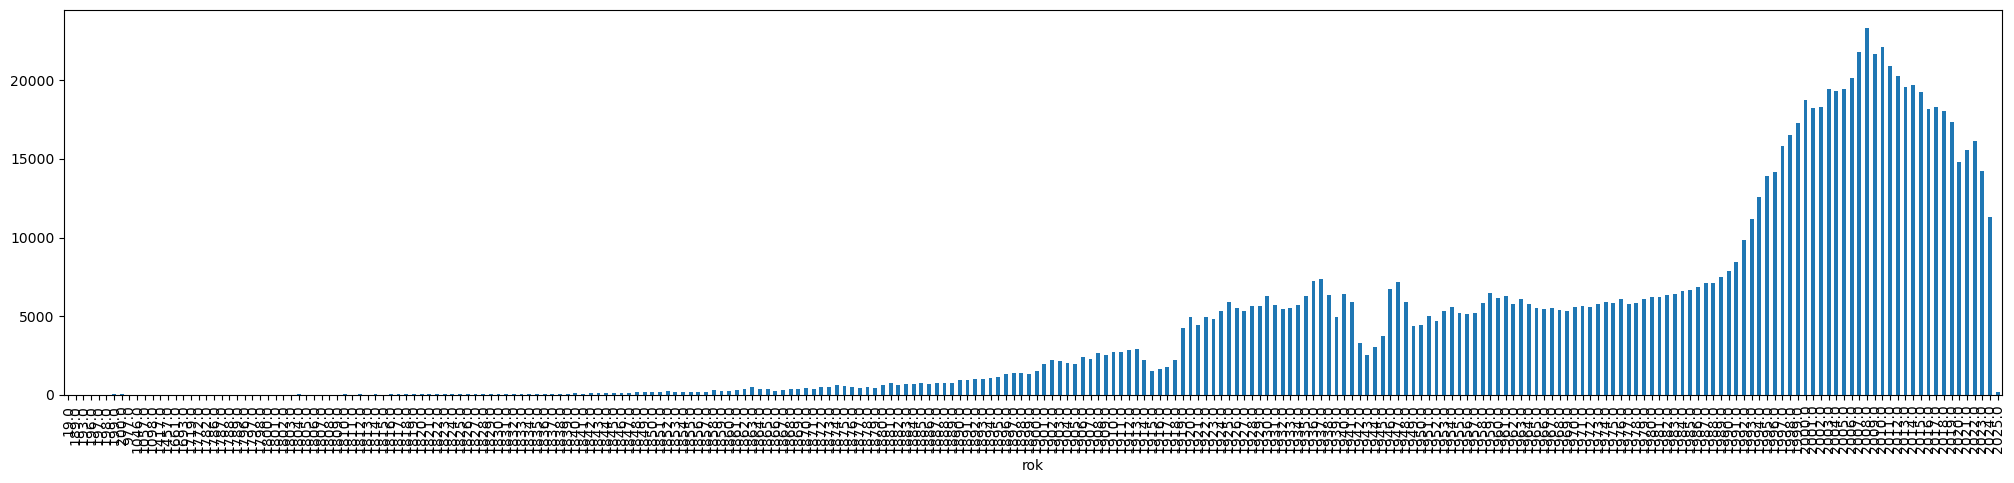

In [25]:
r(df)

In [26]:
df = df[df["leader"].str[6].isin(["a", "t"])]

In [27]:
najdi_zub(df)

Hledám zub mezi lety 1900 a 1901.
1900: 1488, 1901: 1944, poměr: 0.7654320987654321


<Axes: xlabel='rok'>

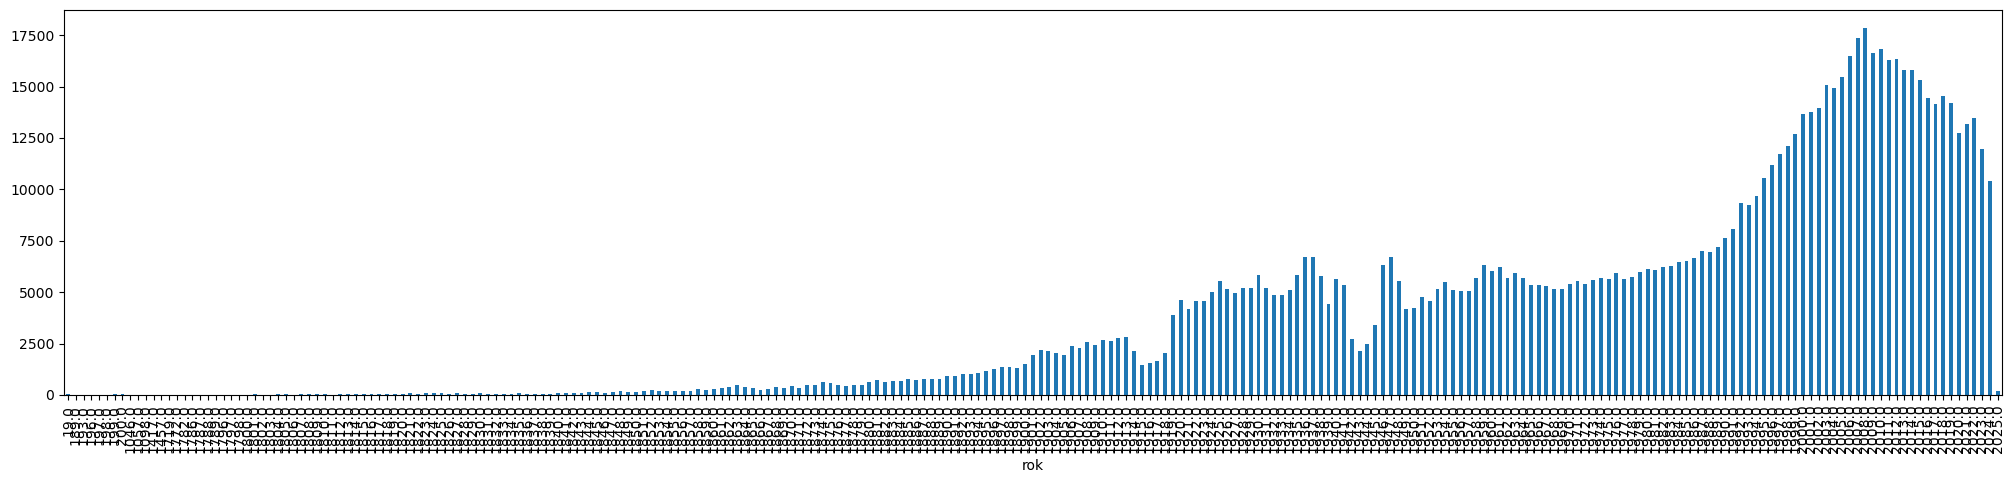

In [28]:
r(df)

In [29]:
df[df['245_a'].astype(str).str.contains('Šikmý kostel',na=False)]

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,080_a,080_2,080_x,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_m,964_a,rok
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20213304795,210129m20202024xr ahf g 000 f cze,nam a22 ia4500,1,0,Šikmý kostel :,románová kronika ztraceného města /,Karin Lednická,None,None,None,None,None,"[821.162.3-31, 94(437.326), (437.326), (0:82-3...","[MRF, MRF, MRF, MRF]",None,None,"[7, 7, 9, 9]","[české romány, historické romány, Czech fictio...","[fd133974, fd132414, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,[aut],1969-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0


In [30]:
df = df[~df["leader"].str[7].isin(["b", "i", "s", " "])]

In [31]:
najdi_zub(df)

Hledám zub mezi lety 1900 a 1901.
1900: 1376, 1901: 1829, poměr: 0.7523236741388737


<Axes: xlabel='rok'>

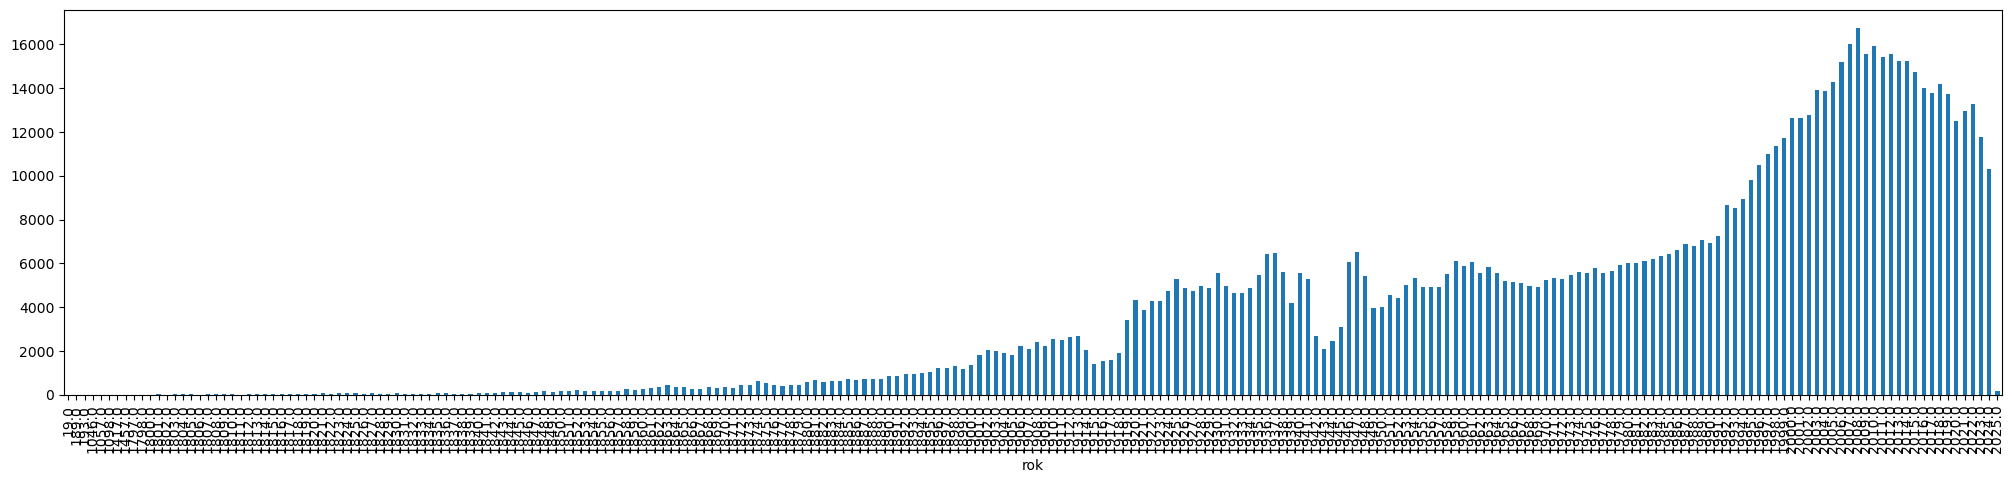

In [32]:
r(df)

In [33]:
df = df.dropna(subset=["rok"])

In [34]:
najdi_zub(df)

Hledám zub mezi lety 1900 a 1901.
1900: 1376, 1901: 1829, poměr: 0.7523236741388737


<Axes: xlabel='rok'>

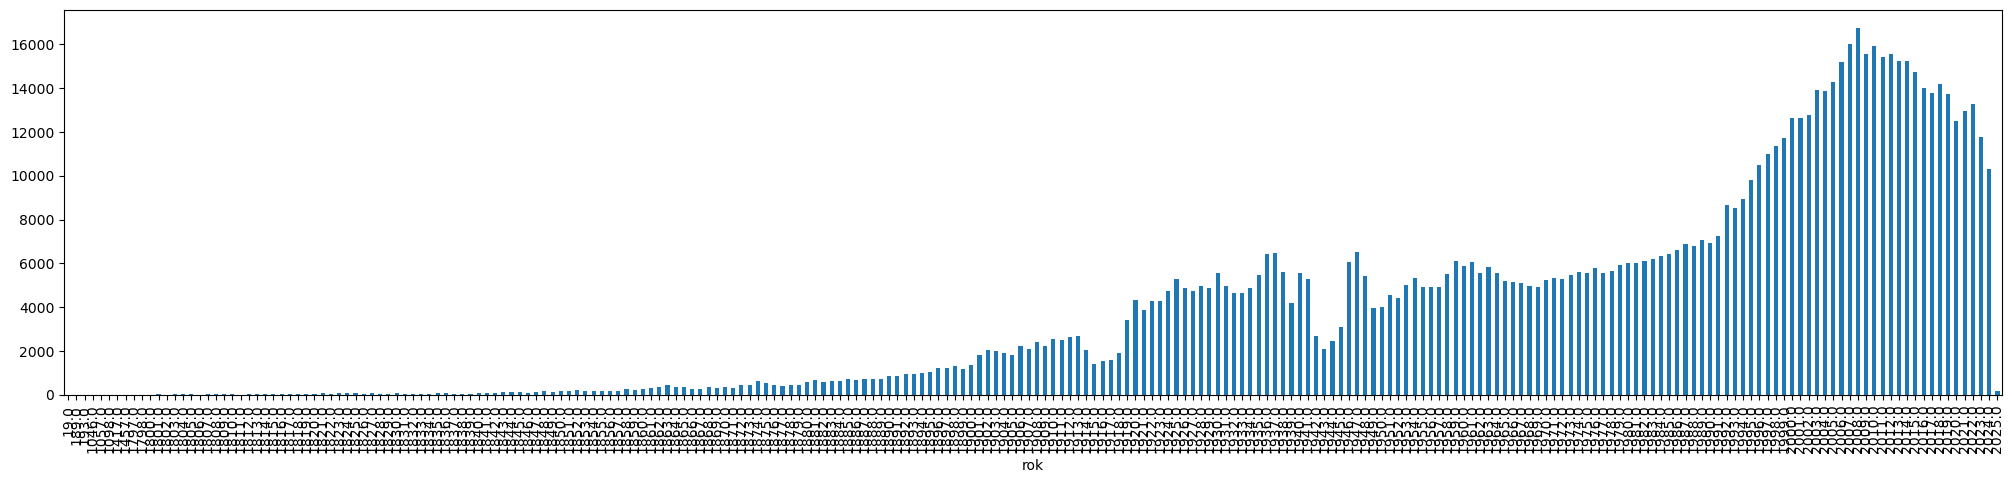

In [35]:
r(df)

In [36]:
df['245_a'].sample(50)

001
bk197501018              Zakládání lesů a šlechtění lesních dřevin :
ck8403536                             Záhady Velikonočního ostrova /
bknhak08978                                            Nelson 1934 :
nkc20162855959                     Harry Potter a princ dvojí krve /
nkc20112224904                              50 tipů na dětský dort :
nos19015251a                                 V tomto slzavém údolí :
nkc20081818717                                       Příběhy Bible /
bk193401195        Nemocenské pojištění soukromých úředníků a zří...
cpk20152751775                                      Léčení diabetu /
bk193803610        Nejnovější sbírka poštovních známek pro menší ...
bk194803922         Základní pojmy v učení o kontrolních methodách /
nos190245171                                        V bouři života :
bknvsv10394        Studijní program dálkového studia na průmyslov...
nkc20071709201                                           Kynologie /
bk194600164                   

In [37]:
df.sample(10)

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,080_a,080_2,080_x,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_m,964_a,rok
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20061651062,060412s2005 xr ac c p 001 0 cze,nam a22 aa4500,0,0,Fyzika 7 :,pro základní školy a víceletá gymnázia /,Karel Rauner ... [et al.],None,None,None,None,None,"[53, (075.2), (075.3), (076.1), (072)]","[MRF, MRF, MRF, MRF, MRF]",None,None,"[7, 7, 7, 7, 9, 9, 9, 9]","[učebnice základních škol, učebnice středních ...","[fd133773, fd133771, fd133116, fd132826, None,...","[czenas, czenas, czenas, czenas, eczenas, ecze...",None,None,None,None,"[7, 7]","[53, 37.016]","[Fyzika, Učební osnovy. Vyučovací předměty. Uč...","[Konspekt, Konspekt]","[6, 22]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.0
ck8604315,860702s1986 xr 000 | cze,nam a22 a 4500,1,0,Okupované pohraničí a české obyvatelstvo 1938-...,None,Josef Bartoš,None,None,None,None,None,[943.7-04-074],[undef],None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[7],[94(437)],[Dějiny Česka a Slovenska],[Konspekt],[8],1,"Bartoš, Josef,",jk01010931,[aut],1931-2005,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Československo - pohraničí okupované - obyvat...,1986.0
bk194400210,990121s1944 xr cze,nam a22 1 4500,1,0,Klempířské úpravy střech /,None,"Jaroslav Čada, Miloslav Mašek",None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Čada, Jaroslav,",jx20051209019,[aut],1889-1969,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1944.0
bk195601672,981202s1956 xr g ||| f cze,nam a22 1 4500,1,0,Podivuhodné příběhy a dobrodružství Jana Korne...,"Jak je zažil na souši i na moři, mezi soldáty,...",[Autor:] Miloš V. Kratochvíl ; Kresby Václava ...,None,None,None,None,None,"[821.162.3-31, (0:82-311.6), (0:82-311.3)]","[MRF, MRF, MRF]",None,None,"[7, 7, 7]","[české romány, historické romány, dobrodružné ...","[fd133974, fd132414, fd132061]","[czenas, czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Kratochvíl, Miloš Václav,",jk01062997,[aut],1904-1988,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Válka třicetiletá 1618-1648 - doba po r. 1645...,1956.0
bknzdr16032,021106s1865 xr a e 000 cze,nam a22 a 4500,1,0,Klášter a kostel sv. Mikuláše na Starém městě ...,None,od Čeňka Kulhánka,None,None,None,None,None,"[27-523.6-789.2, 726.54, 726.71:27-789.2, (437...","[MRF, MRF, MRF, MRF, MRF]",None,None,[7],[pojednání],[fd133056],[czenas],None,None,None,None,[7],[27-78],"[Křesťanská sdružení, spolky a organizace. Řeh...",[Konspekt],[5],1,"Kulhánek, Čeněk,",jx20110310013,[aut],1791-1864,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1865.0
nkc20112223754,110905s2011 xr a g 000 f cze,nam a22 a 4500,1,0,Rekvalifikační kurz /,None,Ondřej Neff,None,None,None,None,None,"[821.162.3-31, (0:82-311.9)]","[MRF, MRF]",None,None,"[7, 7, 9, 9]","[české romány, vědecko-fantastické romány, Cze...","[fd133974, fd133847, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Neff, Ondřej,",jk01082907,[aut],1945-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.0
bk197901176,970306s1978 xr cze,nam a22 1 4500,1,0,Vývoj zdravotní péče o pracující a jejich nemo...,Soubor faktografických materiálů k 30. výročí ...,Zprac. Petr Svátek,None,None,None,None,None,[331.881(437):36(041)],[undef],None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Svátek, Petr",None,[edt],None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Zabezpečení sociální - pracující čs. - vývoj ...,1978.0
bk195801069,980216s1957 xr cze,nam

In [38]:
df = df.dropna(subset=['245_a','100_a'])
najdi_zub(df)
df['titul'] = df['245_a'].apply(lambda x: x[:-1].strip() if x[-1] in [':','/',';','=','.'] else x.strip())

Hledám zub mezi lety 1900 a 1901.
1900: 1194, 1901: 1537, poměr: 0.7768379960962914


<Axes: xlabel='rok'>

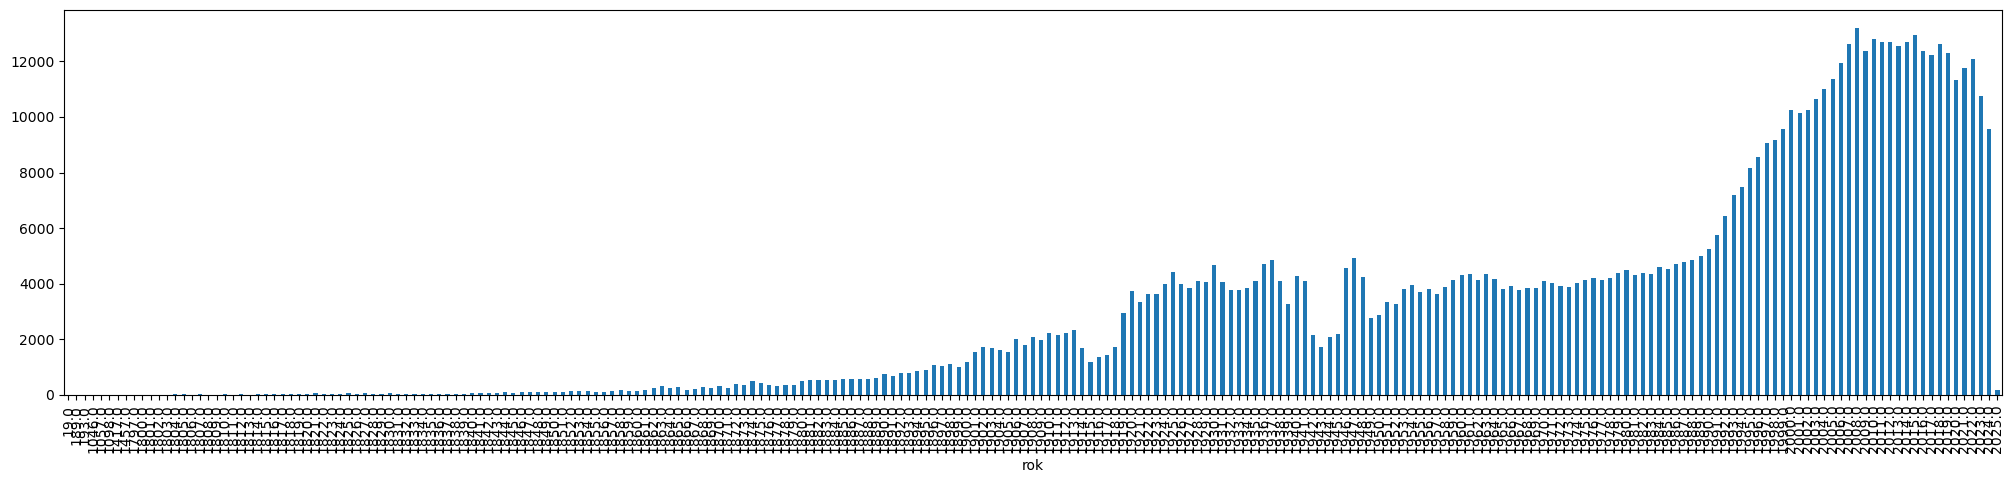

In [39]:
r(df)

## Kontroly divných věcí ze sešitu 112

In [41]:
df[df['245_a'].astype(str).str.contains('Malíř Láďa Rákos')]

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,080_a,080_2,080_x,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_m,964_a,rok,titul
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


## Hledání zubu

In [43]:
najdi_zub(df[df['072_x'].astype(str).str.lower().str.contains('česká próza',na=False)])

Hledám zub mezi lety 1900 a 1901.
1900: 135, 1901: 63, poměr: 2.142857142857143


In [44]:
najdi_zub(df[df['072_a'].astype(str).str.lower().str.contains('821.162.3-3',na=False)])

Hledám zub mezi lety 1900 a 1901.
1900: 135, 1901: 63, poměr: 2.142857142857143


In [45]:
najdi_zub(df[df['080_a'].astype(str).str.contains('821.162.3-3',na=False)])

Hledám zub mezi lety 1900 a 1901.
1900: 132, 1901: 60, poměr: 2.2


In [46]:
najdi_zub(df[df['655_a'].astype(str).str.lower().str.contains(r'české (romány|prózy|novely|povídky)', na=False)])

C:\Users\micha\AppData\Local\Temp\ipykernel_30960\3818377305.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  najdi_zub(df[df['655_a'].astype(str).str.lower().str.contains(r'české (romány|prózy|novely|povídky)', na=False)])


Hledám zub mezi lety 1900 a 1901.
1900: 125, 1901: 53, poměr: 2.358490566037736


In [47]:
najdi_zub(df[(df['080_a'].astype(str).str.contains('885',na=False) & df['080_a'].astype(str).str.contains('82-3',na=False) & ~df['964_a'].astype(str).str.lower().str.contains('hry',na=False) & ~df['072_x'].astype(str).str.lower().str.contains('české drama',na=False))])

Hledám zub mezi lety 1900 a 1901.
division by zero


In [48]:
najdi_zub(df[df['080_a'].astype(str).str.contains('885-321.')])

Hledám zub mezi lety 1900 a 1901.
division by zero


In [49]:
najdi_zub(df[df['080_a'].astype(str).str.contains('885.0-31',na=False)])

Hledám zub mezi lety 1900 a 1901.
1900: 1, 1901: 1, poměr: 1.0


In [50]:
najdi_zub(df[((df['008'].str[33] == '1') & (df['041_h'].isnull()))])

Hledám zub mezi lety 1900 a 1901.
1900: 67, 1901: 36, poměr: 1.8611111111111112


## Finální export

In [52]:
najdi_zub(df)
ceska_proza = df[
    df['072_x'].astype(str).str.lower().str.contains('česká próza',na=False)
    | df['072_a'].astype(str).str.lower().str.contains('821.162.3-3',na=False)
    | df['080_a'].astype(str).str.contains('821.162.3-3',na=False)
    | df['655_a'].astype(str).str.lower().str.contains(r'české (romány|prózy|novely|povídky)', na=False)
    | (df['080_a'].astype(str).str.contains('885',na=False) & df['080_a'].astype(str).str.contains('82-3',na=False) & ~df['964_a'].astype(str).str.lower().str.contains('hry',na=False) & ~df['072_x'].astype(str).str.lower().str.contains('české drama',na=False))
    | df['080_a'].astype(str).str.contains('885-321.')
    | df['080_a'].astype(str).str.contains('885.0-31',na=False)
    | ((df['008'].str[33] == '1') & (df['041_h'].isnull()))
]
## v předchozích fázích tam tyhlety kódované informace nejsou vždycky
## spolehát ještě na 45-83
## 19. století se už 20 let rekatalogizuje
najdi_zub(ceska_proza)
ceska_proza = ceska_proza[ceska_proza['100_a'].notnull()]
najdi_zub(ceska_proza)
ceska_proza['autorstvo'] = ceska_proza['100_a'].apply(lambda x: x.replace(',','').strip() if x != None else None)
ceska_proza['autorstvo_kod'] = ceska_proza['100_7']
ceska_proza2 = ceska_proza.sort_values(by='rok').drop_duplicates(subset=['titul','autorstvo'], keep='first')

Hledám zub mezi lety 1900 a 1901.
1900: 1194, 1901: 1537, poměr: 0.7768379960962914


C:\Users\micha\AppData\Local\Temp\ipykernel_30960\4109413381.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  | df['655_a'].astype(str).str.lower().str.contains(r'české (romány|prózy|novely|povídky)', na=False)


Hledám zub mezi lety 1900 a 1901.
1900: 186, 1901: 84, poměr: 2.2142857142857144
Hledám zub mezi lety 1900 a 1901.
1900: 186, 1901: 84, poměr: 2.2142857142857144


In [53]:
ceska_proza2[['rok','titul','autorstvo','autorstvo_kod']].sample(20)

,rok,titul,autorstvo,autorstvo_kod
001,,,,
nkc20233498800,2023.0,Jmenuji se Olenka,Rožnovská Lenka,xx0130765
nkc20122428531,2012.0,Srdcem proti rozumu,Kristl Tomáš,xx0147402
bk194004585,1940.0,Požehnaný den,Vrba Jan,jk01150966
nkc20233519759,2023.0,Královna lesa,Kohoutová Kateřina Bětka,xx0327784
ck9100465,1990.0,Vesnická učitelka,Sojková Kamila,jk01120328
np9538974,1995.0,Červenec má oslí uši,Procházková Iva,jn19990209690
nkc20112223206,2011.0,Létem políbená,Lanczová Lenka,jn20000401598
cpk20223428917,2009.0,Obrázky z Klenčí,Baar Jan,js20070223001
cpk19980294865,1997.0,Sen na konci rána,Zapletal Zdeněk,jk01152134


<Axes: xlabel='rok'>

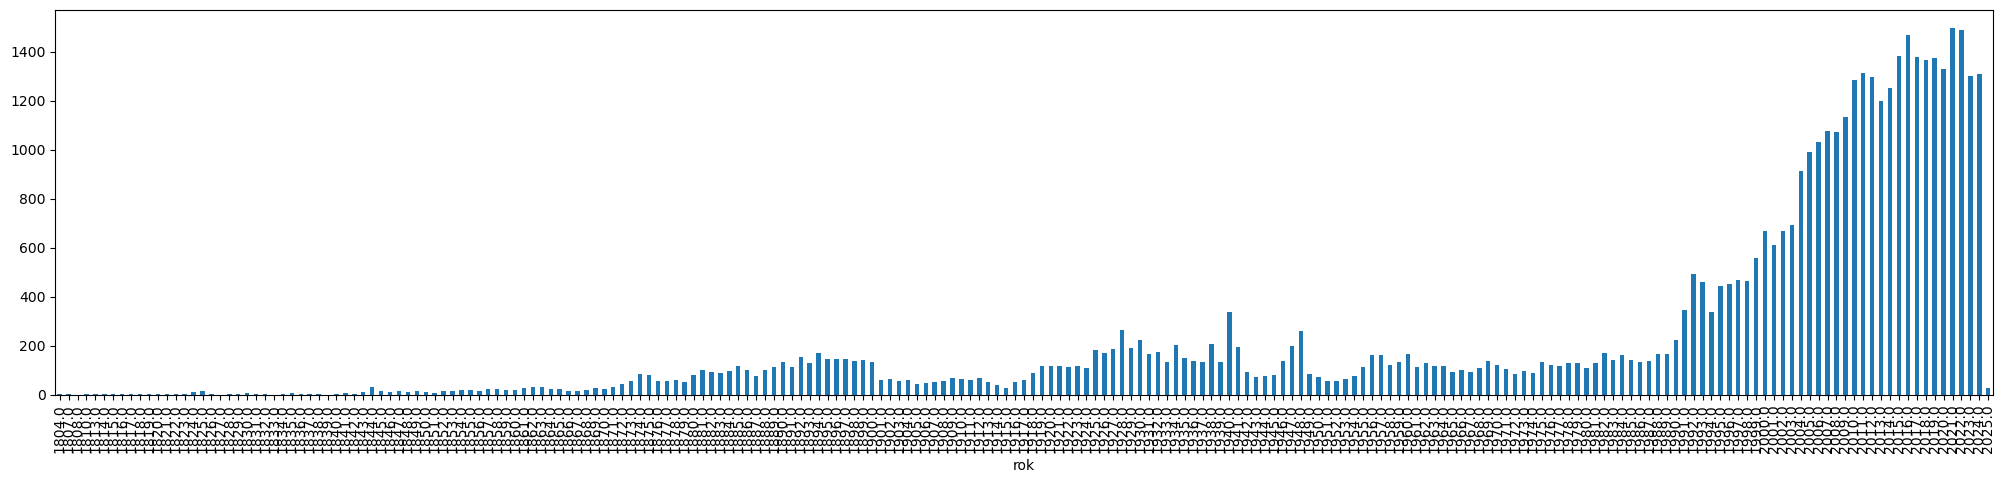

In [54]:
r(ceska_proza2)

In [55]:
ceska_proza2[ceska_proza2['rok'] == 1890].sample(20)

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,080_a,080_2,080_x,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_m,964_a,rok,titul,autorstvo,autorstvo_kod
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
gk20021403,220114s1890 xr g ||| | cze,nam a22 1a 4500,1,0,Jen nóbl ;,"Co tatínek činí, vždycky dobře činí /",V. Kosmák,None,None,None,None,None,"[821.162.3-3, (0:82-3)]","[MRF, MRF]",None,None,[7],[české prózy],[fd133972],[czenas],None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Kosmák, Václav,",jk01061959,[aut],1843-1898,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1890.0,Jen nóbl,Kosmák Václav,jk01061959
nkc20102149281,101108s1890 xr e 000 j cze,nam a22 a 4500,1,0,"Gondoktér, čili, Kapesní průvodce vístavou pař...",None,kteréhoš s velikím namahánim a drahou skušenos...,None,None,None,None,None,"[821.162.3-3, 061.41, (44), (0:82-321.5)]","[MRF, MRF, MRF, MRF]",None,None,[7],[humoristické prózy],[fd132429],[czenas],None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Herrmann, Ignát,",jk01040882,[aut],1854-1935,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1890.0,"Gondoktér, čili, Kapesní průvodce vístavou pař...",Herrmann Ignát,jk01040882
nkc20071763459,071113s1890 xr a g 000 j cze,nam a22 a 4500,1,0,Z Čech až na konec světa /,None,dle pamětí o staročeském cestování vypravuje A...,None,None,None,None,None,"[821.162.3-32, 929.7, 910.4, (4-15), (0:82-321...","[MRF, MRF, MRF, MRF, MRF, MRF]",None,None,"[7, 7, 7]","[české povídky, historické povídky, cestopisné...","[fd133971, fd132412, fd131952]","[czenas, czenas, czenas]",None,None,None,None,"[7, 7]","[821.162.3-3, 913(4)]","[Česká próza, Geografie Evropy, reálie, cestov...","[Konspekt, Konspekt]","[25, 7]",1,"Jirásek, Alois,",jk01051816,[aut],1851-1930,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1890.0,Z Čech až na konec světa,Jirásek Alois,jk01051816
cpk20041312300,040419s1890 xr ab j 000 1 cze,nam a22 a 4500,1,0,Z výletů po Jičínsku /,None,napsal Čeněk Kalandra ; illustroval Karel L. T...,None,None,None,None,None,"[908(437.313), (0.053.6), (0:82-992)]","[MRF, MRF, MRF]",None,None,"[7, 7]","[publikace pro mládež, cestopisy]","[fd133157, fd131956]","[czenas, czenas]",None,None,None,None,"[7, 7]","[913(437), 0/9-053.2]","[Geografie Česka a Slovenska, reálie, cestován...","[Konspekt, Konspekt]","[7, 26]",1,"Kalandra, Čeněk,",jk01052611,[aut],1848-1928,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1890.0,Z výletů po Jičínsku,Kalandra Čeněk,jk01052611
cpk20021180011,020715s1890 xr c 000 j cze,nam a22 a 4500,1,0,Rada pro život :,v krátkých povídkách /,sepsal A. Potůček,None,None,None,None,None,"[821.162.3-32, 82-93]","[MRF, MRF]",None,None,"[7, 7, 7]","[publikace pro mládež, české povídky, didaktic...","[fd133157, fd133971, fd165100]","[czenas, czenas, czenas]",None,None,None,None,"[7, 7]","[821.162.3-3, 821-93]","[Česká próza, Literatura pro děti a mládež (be...","[Konspekt, Konspekt]","[25, 26]",1,"Potůček, Adolf,",jk01100801,[aut],1842-1904,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1890.0,Rada pro život,Potůček Adolf,jk01100801
bknmik00729,010606s1890 xr e 000 j cze,nam a22 a 4500,1,0,Hanácké figurky /,None,nakreslil Otakar Bystřina,None,None,None,None,None,"[821.162.3-32, (0:82-321.5)]","[MRF, MRF]",None,None,"[7, 7]","[české povídky, humoristické povídky]","[fd133971, fd132428]","[czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Bystřina, Otakar,",jk01020502,"[aut, ill]",1861-1931,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1890.0,Hanácké figurky,Bystřina Otakar,jk01020502
bknzdr28931,031017s1890 xr b 000 j cze,nam a22 1a 

In [56]:
len(ceska_proza2)

47933

In [57]:
ceska_proza2.sample(20)

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,080_a,080_2,080_x,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_m,964_a,rok,titul,autorstvo,autorstvo_kod
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bknjje03216,030508s1898 xr a g 000 1 cze,nam a22 4500,1,0,Klášter Želiv /,None,"cestopisná črta, již napsal Václav Petrů",None,None,None,None,None,"[726.71:27-789.43, 908(437.324), (0:82-321.8)]","[MRF, MRF, MRF]",None,None,[7],[cestopisné prózy],[fd205190],[czenas],None,None,None,None,[7],[913(437)],"[Geografie Česka a Slovenska, reálie, cestování]",[Konspekt],[7],1,"Petrů, Václav,",jk01092851,[aut],1841-1906,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1898.0,Klášter Želiv,Petrů Václav,jk01092851
bkn20021187260,021001s1919 xr e 000 1 cze,nam a22 4500,1,0,Na uvítanou panu cís. radovi Penížkovi! /,None,Eduard Bass ; s karikaturou Zdeňka Kratochvíla,None,None,None,None,None,"[784.71, (041)]","[MRF, MRF]",None,None,[7],[letáky],[fd132728],[czenas],None,None,None,None,[7],[784],[Vokální hudba],[Konspekt],[9],1,"Bass, Eduard,",jk01011066,[aut],1888-1946,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1919.0,Na uvítanou panu cís. radovi Penížkovi!,Bass Eduard,jk01011066
nkc20051633873,051206s2006 xr c 000 f cze,nam a22 a 4500,1,0,"Mary, ty jsi mazaná! /",None,Věra Řeháčková,None,None,None,None,None,"[821-93, 821.162.3-31, (0:82-31)]","[MRF, MRF, MRF]",None,None,"[7, 7, 9, 9]","[české romány, publikace pro děti, Czech ficti...","[fd133974, fd133156, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,"[7, 7]","[821.162.3-3, 821-93]","[Česká próza, Literatura pro děti a mládež (be...","[Konspekt, Konspekt]","[25, 26]",1,"Řeháčková, Věra,",jn19990209737,[aut],1950-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.0,"Mary, ty jsi mazaná!",Řeháčková Věra,jn19990209737
nkc20112194470,110512s2011 xr g 000 facze d,cam a22 a 4500,1,0,Další báječný rok /,None,Michal Viewegh,None,None,None,None,None,"[821.162.3-3, 821.162.3-051, 929, (0:82-322.6)...","[MRF, MRF, MRF, MRF, MRF]",None,None,"[7, 7, 7, 9, 9, 9]","[české prózy, autobiografické prózy, deníky, C...","[fd133972, fd131850, fd132006, None, None, None]","[czenas, czenas, czenas, eczenas, eczenas, ecz...",None,None,None,None,"[7, 7]","[821.162.3-3, 929]","[Česká próza, Biografie]","[Konspekt, Konspekt]","[25, 8]",1,"Viewegh, Michal,",jn19990010021,[aut],1962-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.0,Další báječný rok,Viewegh Michal,jn19990010021
nkc20152662902,150216s2014 xr a b 000 j cze,nam a22 a 4500,1,0,Za Aničkou kolem světa /,None,napsal Martin E. Kyšperský ; ilustrovala Alžbě...,None,None,None,None,None,"[821.162.3-32, 821-93, (0:82-32)]","[MRF, MRF, MRF]",None,None,"[7, 7, 9, 9]","[české příběhy, publikace pro děti, Czech stor...","[fd133973, fd133156, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,"[7, 7]","[821.162.3-3, 821-93]","[Česká próza, Literatura pro děti a mládež (be...","[Konspekt, Konspekt]","[25, 26]",1,"Kyšperský, Martin E.,",jx20070903018,[aut],1980-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,Za Aničkou kolem světa,Kyšperský Martin E.,jx20070903018
nkc20102126063,100913s1894 xr e 000 j cze,nam a22 a 4500,1,0,Ze života :,obrázky a črty ze života kněze.,napsal Bohumil Brodský,[Čásť I /],None,None,None,None,"[821.162.3-32, (0:82-32)]","[MRF, MRF]",None,None,[7],[české povídky],[fd133971],[czenas],None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Zahradník-Brodský, Bohumil,",jk01151969,[aut],1862-1939,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1894.0,Ze života,Zahradník-Brodský Bohumil,jk01151969
nkc20142582242,14

In [58]:
ceska_proza2[ceska_proza2['autorstvo'] == 'Němcová Božena']

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,080_a,080_2,080_x,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_m,964_a,rok,titul,autorstvo,autorstvo_kod
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpk20122433977,121221m18451848xr g 000 f cze,nam a22 ia4500,1,0,Národní báchorky a powěsti /,None,od Boženy Němcowé,None,None,None,None,None,"[821.162.3-34, (0:82-34)]","[MRF, MRF]",None,None,[7],[české pohádky],[fd133970],[czenas],None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Němcová, Božena,",jk01083016,[aut],1820-1862,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1845.0,Národní báchorky a powěsti,Němcová Božena,jk01083016
cpk20223420309,220509m18541855xr g 000 f cze,nam a22 ia4500,1,0,Národní Báchorky a Pověsti od Boženy Němcové,None,None,None,None,None,None,None,"[821.162.3-34, (0:82-34)]","[MRF, MRF]",None,None,"[7, 7]","[české pověsti, české pohádky]","[fd201456, fd133970]","[czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Němcová, Božena,",jk01083016,[aut],1820-1862,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1854.0,Národní Báchorky a Pověsti od Boženy Němcové,Němcová Božena,jk01083016
bknhak08992,030516s1855 xr e 000 f cze,nam a22 a 4500,1,0,Babička :,obrazy venkovského života /,od Boženy Němcové,None,None,None,None,None,"[821.162.3-3, (0:82-3)]","[MRF, MRF]",None,None,"[7, 9]","[české prózy, Czech prose]","[fd133972, None]","[czenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Němcová, Božena,",jk01083016,[aut],1820-1862,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1855.0,Babička,Němcová Božena,jk01083016
cpk20132502523,131002s1856 xr 000 1 cze,nam a22 aa4500,1,0,Pohorská vesnice :,povídka ze života lidu venkovského /,od Boženy Němcové,None,None,None,None,None,"[821.162.3-3, (0:82-3)]","[MRF, MRF]",None,None,"[7, 9]","[české prózy, Czech prose]","[fd133972, None]","[czenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Němcová, Božena,",jk01083016,[aut],1820-1862,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1856.0,Pohorská vesnice,Němcová Božena,jk01083016
bknhak09084,030517m18571858xr e 000 1 cze,nam a22 1 4500,1,0,Slovenské pohádky a pověsti.,None,od Boženy Němcové,[Sv. I-X /],None,None,None,None,"[821.162.4-34, (0:82-34)]","[MRF, MRF]",None,None,"[7, 7]","[slovenské pohádky, slovenské pověsti]","[fd133448, fd219004]","[czenas, czenas]",None,None,None,None,[7],[821.162.4],[Slovenská literatura],[Konspekt],[25],1,"Němcová, Božena,",jk01083016,[aut],1820-1862,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1857.0,Slovenské pohádky a pověsti,Němcová Božena,jk01083016
bknhak08993,030516s1862 xr ||| 1 cze,nam a22 1 4500,1,0,Babička [a jiné povídky] /,None,Božena Němcová,None,None,None,None,None,"[821.162.3-3, (0:82-3), (081.1)]","[MRF, MRF, MRF]",None,None,"[7, 7, 9, 9]","[české prózy, sebrané spisy, Czech prose, coll...","[fd133972, fd133355, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Němcová, Božena,",jk01083016,[aut],1820-1862,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1862.0,Babička [a jiné povídky],Němcová Božena,jk01083016
cpk20132447922,130320s1862 xr e 000 j cze,nam a22 aa4500,1,0,Drobné povídky /,None,od Boženy Němcové,None,None,None,None,None,[821.162.3-32],[MRF],None,None,[7],[české povídky],[fd133971],[czenas],None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Němcová, Božena,",jk01083016,[aut],1820-1862,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1862.0,Drobné povídky,Němcová B

In [59]:
nechcemejetam = [
    "jn19990008769",
    "jx20060515016",
    "jn19981002230",
    "jn19981001737",
    "jn19990210182",
    "jn19990001842",
    "jn19990002786",
    "jn19990004346",
    "jn20020721077",
    "jn19990210513",
    "jn19990005488",
    "jo20000080627",
    "jn19990000171",
    "jn20001005715",
    "jn19981002409",
    "jn20000810141"
]

In [60]:
ceska_proza2 = ceska_proza2[~ceska_proza2["100_7"].isin(nechcemejetam)]

In [61]:
ceska_proza2[['rok','titul','autorstvo','autorstvo_kod']].to_json(os.path.join("data","cnb_ceska_proza.json"), orient="index", indent=4)
ceska_proza2[['rok','titul','autorstvo','autorstvo_kod']].to_parquet(os.path.join("data","cnb_ceska_proza.parquet"))

In [62]:
ceska_proza2[ceska_proza2['rok'] == 2024].sort_values(by='008', key=lambda x: x.str[:6], ascending=False)

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,080_a,080_2,080_x,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_m,964_a,rok,titul,autorstvo,autorstvo_kod
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20253671104,250203s2024 xr a 000 1 cze,nam a22 i 4500,1,0,Lesní království /,None,Jan Kosek ; ilustrace: Magdaléna Burdková,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Kosek, Jan,",jo20010088914,[aut],1958-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,Lesní království,Kosek Jan,jo20010088914
nkc20253669488,250131s2024 xr a a 000 j cze,nam a22 i 4500,1,0,O Jamce a Krmce /,None,Sylva Fischerová ; ilustroval Martin Fischer,None,None,None,None,None,"[821.162.3-32, 821-93, (0:82-32)]","[MRF, MRF, MRF]",None,None,"[7, 7, 9, 9]","[české příběhy, publikace pro děti, Czech stor...","[fd133973, fd133156, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,"[7, 7]","[821.162.3-3, 821-93]","[Česká próza, Literatura pro děti a mládež (be...","[Konspekt, Konspekt]","[25, 26]",1,"Fischerová, Sylva,",jn19981001161,[aut],1963-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,O Jamce a Krmce,Fischerová Sylva,jn19981001161
nkc20253669466,250131s2024 xr a c 000 j cze,nam a22 i 4500,1,0,Legenda o Vyšehradu /,None,Ivana Pecháčková ; ilustrovala Klára Břicháčková,None,None,None,None,None,"[821.162.3-34, 821-93, (437.311), (0:82-34)]","[MRF, MRF, MRF, MRF]",None,None,"[7, 7, 9, 9]","[české pověsti, publikace pro děti, Czech lege...","[fd201456, fd133156, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,"[7, 7]","[821.162.3-3, 821-93]","[Česká próza, Literatura pro děti a mládež (be...","[Konspekt, Konspekt]","[25, 26]",1,"Pecháčková, Ivana,",jn20001227763,[aut],1958-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,Legenda o Vyšehradu,Pecháčková Ivana,jn20001227763
nkc20253669465,250131s2024 xr a b 000 j cze,nam a22 i 4500,1,0,Tři malostranští kostlivci /,None,Petr Stančík ; ilustrace Galina Miklínová,None,None,None,None,None,"[821.162.3-34, 821-93, (437.311), (0:82-34)]","[MRF, MRF, MRF, MRF]",None,None,"[7, 7, 9, 9]","[české pověsti, publikace pro děti, Czech lege...","[fd201456, fd133156, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,"[7, 7]","[821.162.3-3, 821-93]","[Česká próza, Literatura pro děti a mládež (be...","[Konspekt, Konspekt]","[25, 26]",1,"Stančík, Petr,",jo2008411895,[aut],1968-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,Tři malostranští kostlivci,Stančík Petr,jo2008411895
nkc20253671103,250131s2024 xr 000 1 cze,nam a22 i 4500,1,0,Modelová torza prahů :,45 opus-textů /,Jaroslav Chobot,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Chobot, Jaroslav,",jn19990218012,[aut],1941-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,Modelová torza prahů,Chobot Jaroslav,jn19990218012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nkc20233550172,230929s2024 xr g 000 j cze,nam a22 i 4500,1,0,Moderní gigolo /,None,Eloise,None,None,None,None,None,"[821.162.3-32, (0:82-321.5)]","[MRF, MRF]",None,None,"[7, 7, 9, 9]","[české příběhy, humoristické příběhy, Czech st...","[fd133973, fd132430, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],0,"Eloise,",xx0321951,[aut],1972-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,Moderní gigolo,Eloise,xx0